In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from sklearn.compose import ColumnTransformer
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import PowerTransformer

## Load and Explore the Data

In [2]:
df_1 = pd.read_csv('./datasets/CSV/player.csv')
df_2 = pd.read_csv('./datasets/CSV/pitching.csv')
df_3 = pd.read_csv('./datasets/CSV/salary.csv')

In [3]:
# display DataFrame

df_1

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
18842,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
18843,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
18844,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [4]:
# Display information about the DataFrame

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      18846 non-null  object 
 1   birth_year     18703 non-null  float64
 2   birth_month    18531 non-null  float64
 3   birth_day      18382 non-null  float64
 4   birth_country  18773 non-null  object 
 5   birth_state    18220 non-null  object 
 6   birth_city     18647 non-null  object 
 7   death_year     9336 non-null   float64
 8   death_month    9335 non-null   float64
 9   death_day      9334 non-null   float64
 10  death_country  9329 non-null   object 
 11  death_state    9277 non-null   object 
 12  death_city     9325 non-null   object 
 13  name_first     18807 non-null  object 
 14  name_last      18846 non-null  object 
 15  name_given     18807 non-null  object 
 16  weight         17975 non-null  float64
 17  height         18041 non-null  float64
 18  bats  

In [5]:
# Check for missing values

df_1.isnull().sum()

player_id           0
birth_year        143
birth_month       315
birth_day         464
birth_country      73
birth_state       626
birth_city        199
death_year       9510
death_month      9511
death_day        9512
death_country    9517
death_state      9569
death_city       9521
name_first         39
name_last           0
name_given         39
weight            871
height            805
bats             1191
throws            978
debut             193
final_game        193
retro_id           54
bbref_id            1
dtype: int64

In [6]:
# Display summary statistics

df_1.describe()

,birth_year,birth_month,birth_day,death_year,death_month,death_day,weight,height
count,18703.000000,18531.000000,18382.000000,9336.000000,9335.000000,9334.000000,17975.000000,18041.000000
mean,1930.664118,6.627327,15.609020,1963.850364,6.484092,15.570281,185.980862,72.255640
std,41.229079,3.467110,8.748942,31.506369,3.528685,8.778580,21.226988,2.598983
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1894.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1936.000000,7.000000,16.000000,1966.000000,6.000000,15.000000,185.000000,72.000000
75%,1968.000000,10.000000,23.000000,1989.000000,10.000000,23.000000,200.000000,74.000000
max,1995.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000


In [7]:
# display DataFrame

df_2

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [8]:
# Display information about the DataFrame

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

In [9]:
# Check for missing values

df_2.isnull().sum()

player_id        0
year             0
stint            0
team_id          0
league_id      131
w                0
l                0
g                0
gs               0
cg               0
sho              0
sv               0
ipouts           1
h                0
er               0
hr               0
bb               0
so               0
baopp         1525
era             90
ibb          14575
wp             133
hbp            559
bk               0
bfp            239
gf             133
r                0
sh           32900
sf           32900
g_idp        43394
dtype: int64

In [10]:
# Display summary statistics

df_2.describe()

,year,stint,w,l,g,gs,cg,sho,sv,ipouts,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
count,44139.000000,44139.00000,44139.000000,44139.000000,44139.000000,44139.000000,44139.000000,44139.00000,44139.000000,44138.000000,...,29564.000000,44006.000000,43580.000000,44139.000000,43900.000000,44006.000000,44139.000000,11239.000000,11239.000000,745.000000
mean,1967.786493,1.07925,4.748794,4.748771,23.667142,9.552550,3.207979,0.45615,1.503976,255.673886,...,2.447064,2.534836,2.271111,0.303881,345.551572,6.355611,43.332291,2.207759,1.908088,4.844295
std,37.352599,0.28443,5.837989,5.007080,18.462900,12.312479,7.134955,1.11821,4.971535,258.428826,...,2.792671,3.438515,3.008115,0.759298,350.259188,10.003279,43.437952,2.751917,2.143002,5.524863
min,1871.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1940.000000,1.00000,0.000000,1.000000,7.000000,0.000000,0.000000,0.00000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1977.000000,1.00000,2.000000,3.000000,22.000000,3.000000,0.000000,0.00000,0.000000,169.000000,...,2.000000,1.000000,1.000000,0.000000,229.000000,3.000000,29.000000,1.000000,1.000000,3.000000
75%,2000.000000,1.00000,7.000000,8.000000,35.000000,18.000000,3.000000,0.00000,1.000000,397.000000,...,4.000000,4.000000,3.000000,0.000000,540.000000,8.000000,68.000000,3.000000,3.000000,7.000000
max,2015.000000,4.00000,59.000000,48.000000,106.000000,75.000000,75.000000,16.00000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,36.000000


In [11]:
# display DataFrame

df_3

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [12]:
# Display information about the DataFrame

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       25575 non-null  int64 
 1   team_id    25575 non-null  object
 2   league_id  25575 non-null  object
 3   player_id  25575 non-null  object
 4   salary     25575 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 999.2+ KB


In [13]:
# Check for missing values

df_3.isnull().sum()

year         0
team_id      0
league_id    0
player_id    0
salary       0
dtype: int64

In [14]:
# Display summary statistics

df_3.describe()

,year,salary
count,25575.000000,2.557500e+04
mean,2000.374389,2.008563e+06
std,8.610604,3.315706e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.750000e+05
50%,2000.000000,5.500000e+05
75%,2008.000000,2.250000e+06
max,2015.000000,3.300000e+07


In [15]:
# Inner merge for df_1 and df_2

df_4 = pd.merge(df_1, df_2, on='player_id', how='inner').drop_duplicates()

In [16]:
# Inner merge for df_4 and df_3

df_baseball = pd.merge(df_4, df_3, on='player_id', how='inner').drop_duplicates()

In [17]:
# Display DataFrame

df_baseball

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,...,bfp,gf,r,sh,sf,g_idp,year_y,team_id_y,league_id_y,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,61.0,5.0,8,0.0,1.0,NaN,2004,SFN,NL,300000
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,61.0,5.0,8,0.0,1.0,NaN,2007,CHA,AL,387500
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,61.0,5.0,8,0.0,1.0,NaN,2008,BOS,AL,403250
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,61.0,5.0,8,0.0,1.0,NaN,2009,SEA,AL,419000
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,61.0,5.0,8,0.0,1.0,NaN,2010,SEA,AL,2750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134039,zumayjo01,1984.0,11.0,9.0,USA,CA,Chula Vista,NaN,NaN,NaN,...,156.0,6.0,13,2.0,3.0,NaN,2007,DET,AL,410000
134040,zumayjo01,1984.0,11.0,9.0,USA,CA,Chula Vista,NaN,NaN,NaN,...,156.0,6.0,13,2.0,3.0,NaN,2008,DET,AL,420000
134041,zumayjo01,1984.0,11.0,9.0,USA,CA,Chula Vista,NaN,NaN,NaN,...,156.0,6.0,13,2.0,3.0,NaN,2009,DET,AL,735000
134042,zumayjo01,1984.0,11.0,9.0,USA,CA,Chula Vista,NaN,NaN,NaN,...,156.0,6.0,13,2.0,3.0,NaN,2010,DET,AL,915000


Text(0.5, 1.0, 'Quantifying missing data')

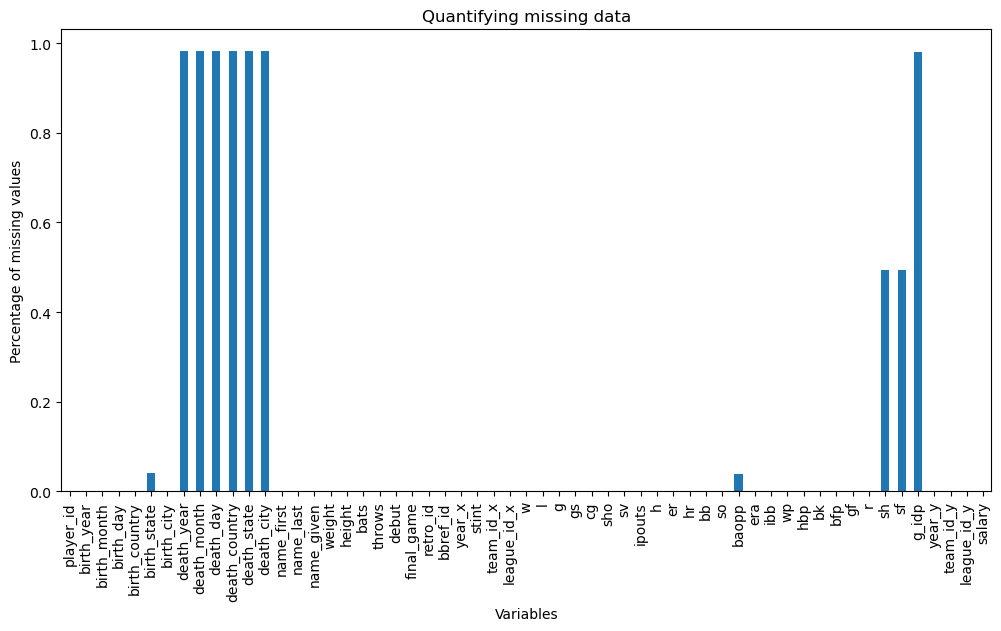

In [18]:
# Visualise the percentage of missing values for each variable

df_baseball.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

Text(0.5, 1.0, 'Cardinality')

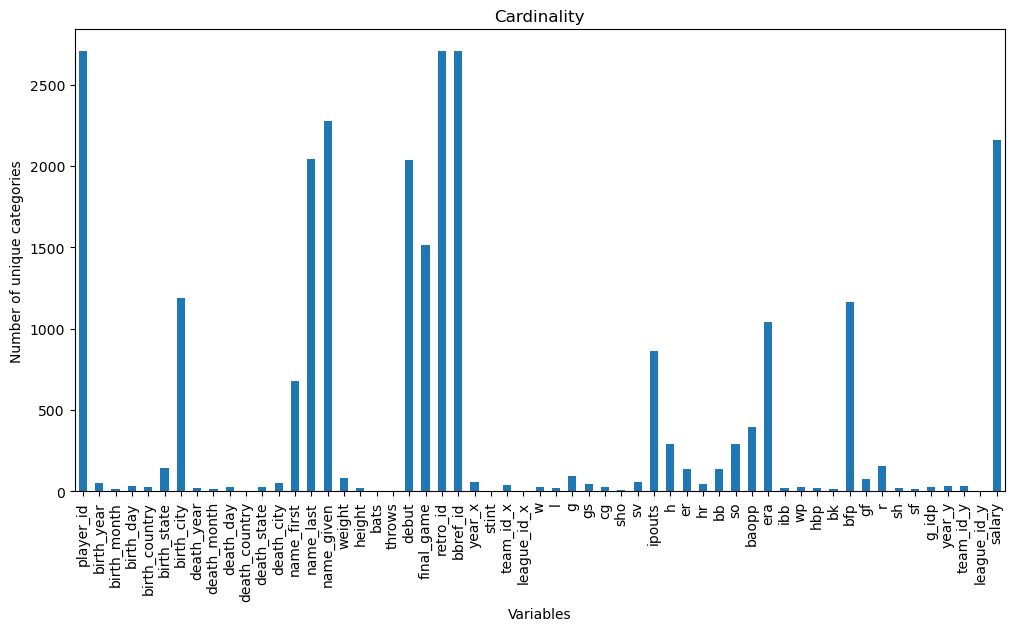

In [19]:
# Visualise the cardinality of the variables 
df_baseball.nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [20]:
# find categorical variables

cat_cols = [c for c in df_baseball.columns if df_baseball[c].dtypes =='O']
df_baseball[cat_cols].isnull().mean().sort_values()

player_id        0.000000
league_id_x      0.000000
team_id_x        0.000000
bbref_id         0.000000
retro_id         0.000000
final_game       0.000000
debut            0.000000
throws           0.000000
bats             0.000000
name_given       0.000000
name_last        0.000000
name_first       0.000000
birth_country    0.000000
team_id_y        0.000000
league_id_y      0.000000
birth_city       0.000657
birth_state      0.041457
death_city       0.981596
death_state      0.981596
death_country    0.981596
dtype: float64

In [21]:
# find numerical variables

num_cols = [c for c in df_baseball.columns if df_baseball[c].dtypes !='O']
df_baseball[num_cols].isnull().mean().sort_values()

birth_year     0.000000
r              0.000000
gf             0.000000
bfp            0.000000
bk             0.000000
wp             0.000000
so             0.000000
bb             0.000000
hr             0.000000
er             0.000000
year_y         0.000000
sv             0.000000
sho            0.000000
cg             0.000000
h              0.000000
g              0.000000
birth_month    0.000000
birth_day      0.000000
gs             0.000000
weight         0.000000
height         0.000000
salary         0.000000
stint          0.000000
w              0.000000
l              0.000000
year_x         0.000000
hbp            0.000007
ipouts         0.000007
ibb            0.000007
era            0.000589
baopp          0.038786
sh             0.494547
sf             0.494547
g_idp          0.979067
death_day      0.981596
death_month    0.981596
death_year     0.981596
dtype: float64

In [22]:
# Generate descriptive statistics for numerical variables

df_baseball[num_cols].describe()

,birth_year,birth_month,birth_day,death_year,death_month,death_day,weight,height,year_x,stint,...,hbp,bk,bfp,gf,r,sh,sf,g_idp,year_y,salary
count,134044.000000,134044.000000,134044.000000,2467.000000,2467.000000,2467.000000,134044.000000,134044.000000,134044.000000,134044.000000,...,134043.000000,134044.000000,134044.000000,134044.000000,134044.000000,67753.000000,67753.000000,2806.000000,134044.000000,1.340440e+05
mean,1969.396071,6.857360,15.734169,2007.224970,7.201459,18.238752,202.135590,74.422801,1999.158784,1.093313,...,2.806308,0.475083,381.534727,8.572760,43.661611,2.976990,2.418727,6.347113,1999.758803,2.241165e+06
std,9.119085,3.451533,8.849878,6.297831,2.911431,8.736950,22.461603,2.123107,9.171368,0.304823,...,3.000254,1.017537,299.177041,14.037283,34.445890,3.154237,2.357307,6.021705,8.281402,3.306064e+06
min,1925.000000,1.000000,1.000000,1989.000000,1.000000,1.000000,150.000000,66.000000,1954.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,0.000000e+00
25%,1963.000000,4.000000,8.000000,2006.000000,5.000000,11.000000,185.000000,73.000000,1993.000000,1.000000,...,1.000000,0.000000,140.000000,0.000000,16.000000,1.000000,1.000000,2.000000,1993.000000,3.230000e+05
50%,1969.000000,7.000000,16.000000,2008.000000,7.000000,22.000000,200.000000,74.000000,2000.000000,1.000000,...,2.000000,0.000000,288.000000,2.000000,31.000000,2.000000,2.000000,5.000000,2000.000000,8.000000e+05
75%,1976.000000,10.000000,23.000000,2012.000000,10.000000,24.000000,215.000000,76.000000,2006.000000,1.000000,...,4.000000,1.000000,607.000000,11.000000,71.000000,4.000000,4.000000,10.000000,2007.000000,2.861113e+06
max,1993.000000,12.000000,31.000000,2015.000000,12.000000,31.000000,305.000000,83.000000,2015.000000,4.000000,...,21.000000,16.000000,1436.000000,79.000000,166.000000,21.000000,14.000000,36.000000,2015.000000,3.257100e+07


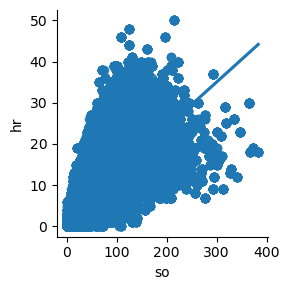

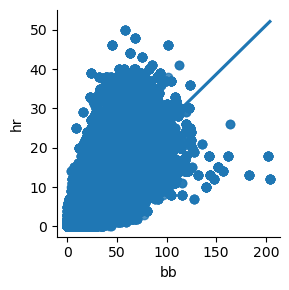

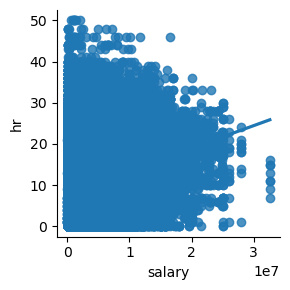

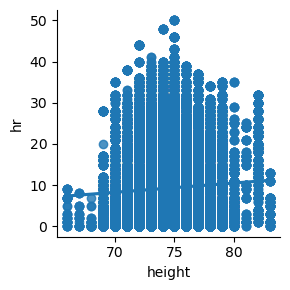

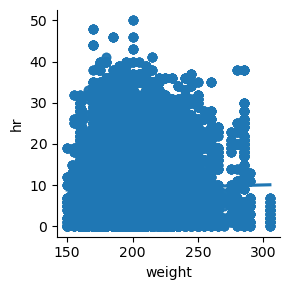

In [23]:
# Visualise relationship between independent variables and target variable 

for column in ['so', 'bb', 'salary', 'height', 'weight']:
    sns.lmplot(x=column, y="hr", data=df_baseball, order=1, height=3)

## Data Cleansing and Transformation

### Train Test Split

In [24]:
# Separate the data into training (70%) and testing sets (30%)
# Target Variable is "HR"

X_train, X_test, y_train, y_test = train_test_split(
    df_baseball.drop('hr', axis=1), df_baseball['hr'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((93830, 56), (40214, 56))

In [25]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

### Removal of Train Ouliers

In [26]:
# Explore the distributuion of the variables

def diagnostic_plots(df, variable, title):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title(f'{title} Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')
    plt.title(f'{title} Q-Q Plot')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title(f'{title} Boxplot')


    plt.show()
    

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


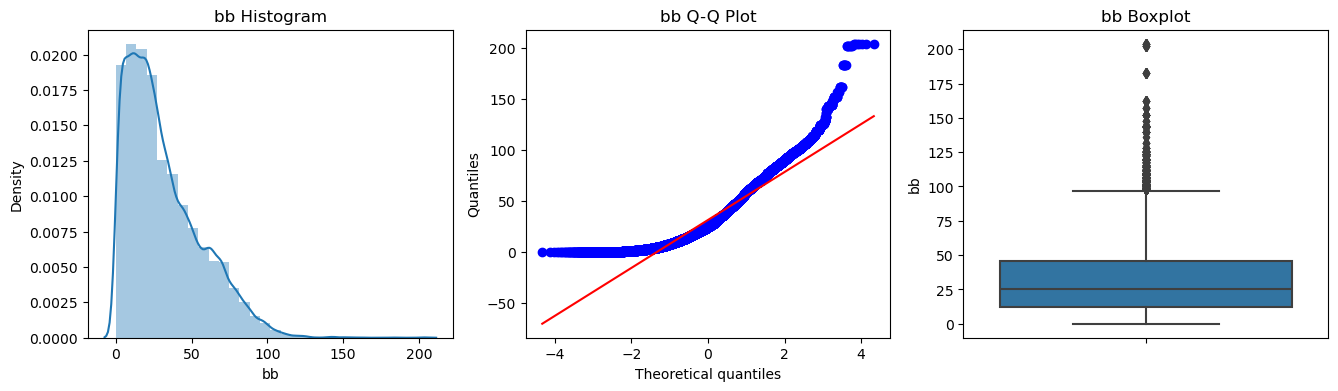

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


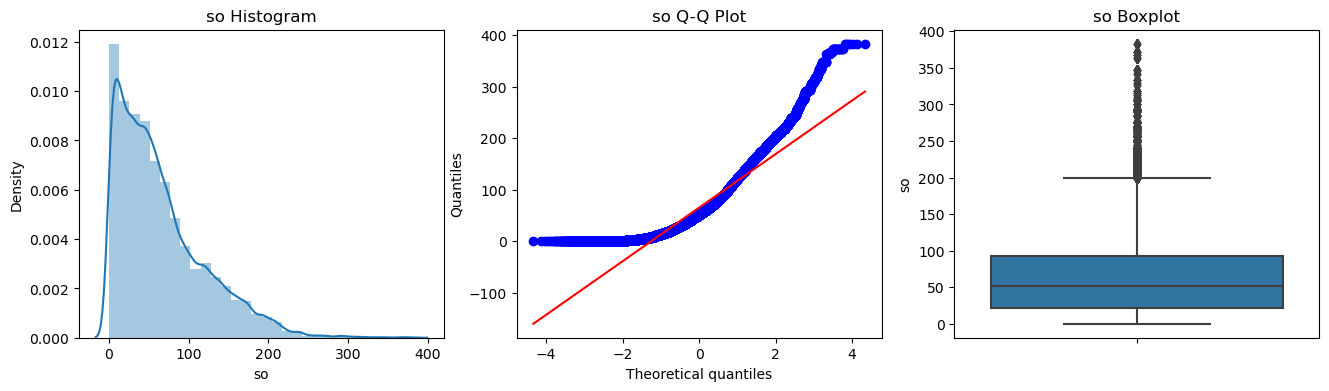

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


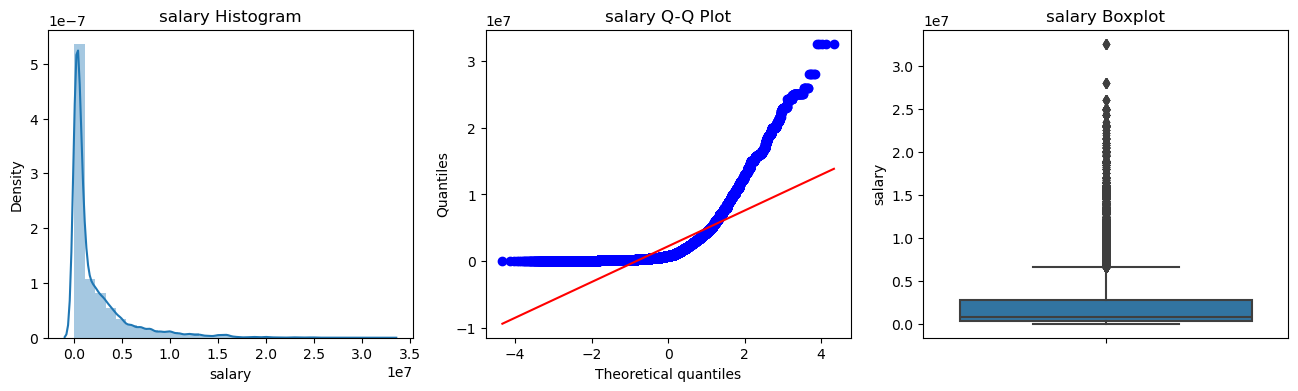

In [27]:
# Display histogram, Q-Q plot and Box plot for numerical variables

for variable in ['bb', 'so', 'salary']:
    diagnostic_plots(train, variable, title = variable)

In [28]:
# Trimming function 

def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [29]:
# Finding the upper and lower limit for bb

bb_upper_limit, bb_lower_limit = find_boundaries(train, 'bb', 1.5)
bb_upper_limit, bb_lower_limit

(97.0, -39.0)

In [30]:
# let's flag the outliers in the data set for bb

outliers_bb = np.where(train['bb'] > bb_upper_limit, True,
                       np.where(train['bb'] < bb_lower_limit, True, False))

In [31]:
# Outliers were trimmed for bb

train1 = train.loc[~outliers_bb ]

train.shape, train1.shape

((93830, 57), (92686, 57))

In [32]:
# Finding the upper and lower limit for so

so_upper_limit, so_lower_limit = find_boundaries(train1, 'so', 1.5)
so_upper_limit, so_lower_limit

(194.5, -81.5)

In [33]:
# let's flag the outliers in the data set for so

outliers_so = np.where(train1['so'] > so_upper_limit, True,
                       np.where(train1['so'] < so_lower_limit, True, False))

In [34]:
# Outliers were trimmed for so

train2 = train1.loc[~outliers_so ]

train1.shape, train2.shape

((92686, 57), (90249, 57))

In [35]:
# Finding the upper and lower limit for salary

salary_upper_limit, salary_lower_limit = find_boundaries(train2, 'salary', 1.5)
salary_upper_limit, salary_lower_limit

(6275250.0, -3258750.0)

In [36]:
# let's flag the outliers in the data set for salary

outliers_salary = np.where(train2['salary'] > salary_upper_limit, True,
                       np.where(train2['salary'] < salary_lower_limit, True, False))

In [37]:
# Outliers were trimmed for salary

train3 = train2.loc[~outliers_salary]

train2.shape, train3.shape

((90249, 57), (82235, 57))

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


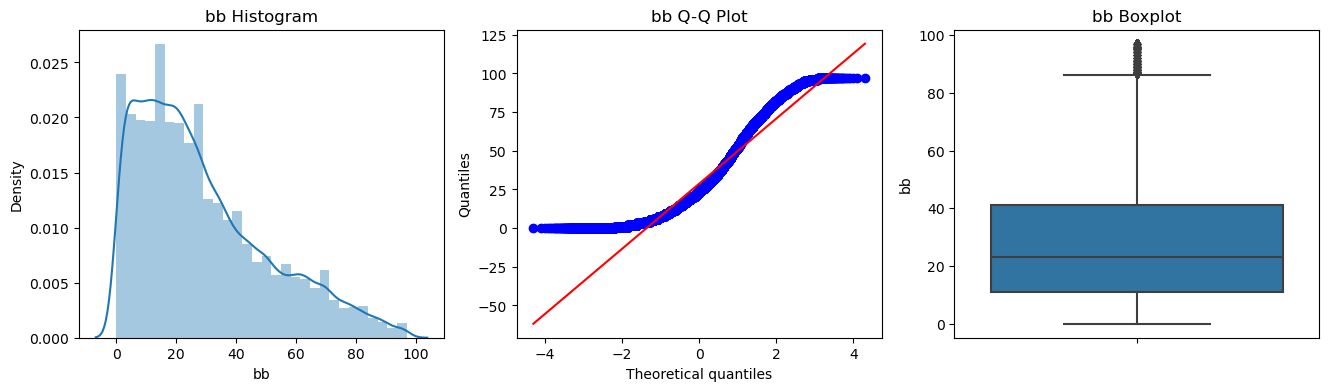

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


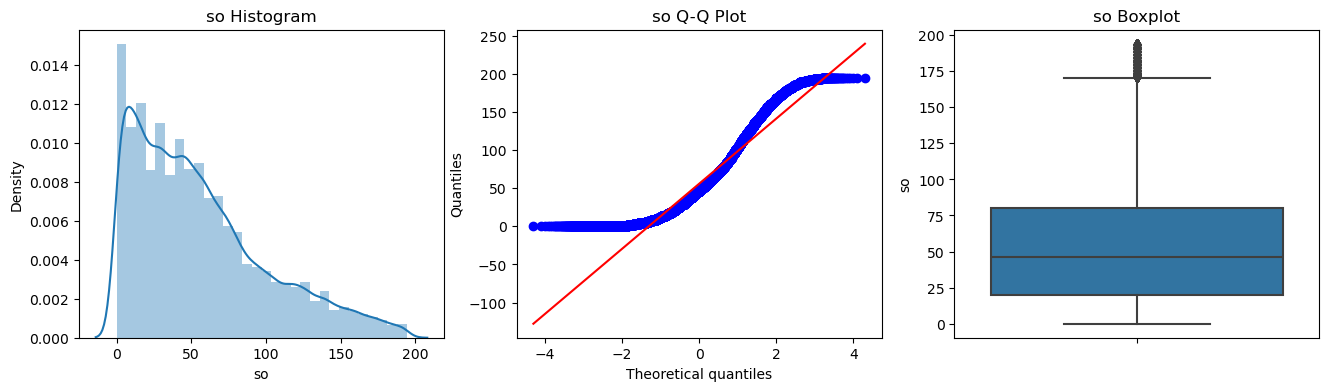

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/4266433478.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


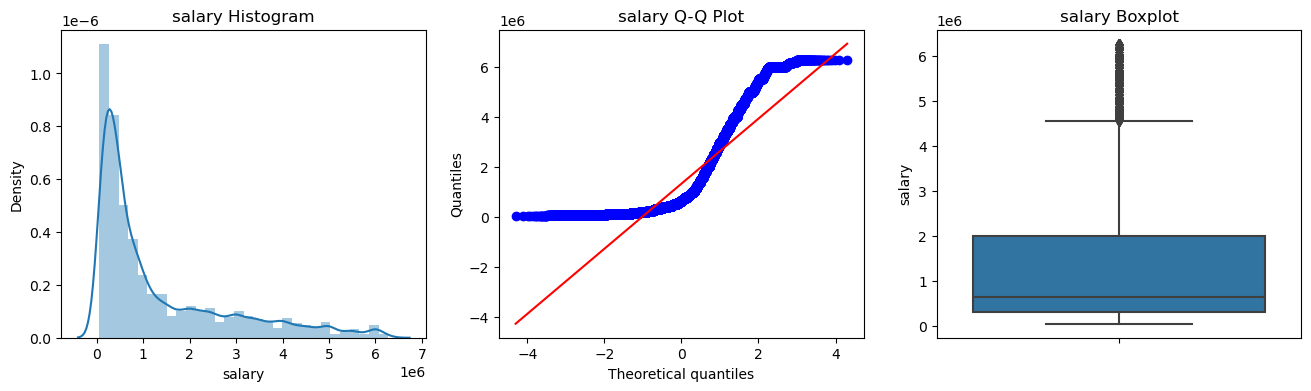

In [38]:
# Display histogram, Q-Q plot and Box plot for numerical variables

for variable in ['bb', 'so', 'salary']:
    diagnostic_plots(train3, variable, title = variable)

### Discretisation

In [39]:
X_train_new = train3.drop('hr', axis=1)  
y_train_new = train3['hr']

In [40]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['height', 'weight'], return_object=True)

disc.fit(X_train_new)

EqualFrequencyDiscretiser(return_object=True, variables=['height', 'weight'])

In [41]:
train_t = disc.transform(X_train_new)
test_t = disc.transform(X_test)

train_t[['height', 'weight']]

,height,weight
110101,3,7
4271,2,0
47567,1,1
10937,2,1
98272,5,4
...,...,...
41993,3,4
97639,2,4
95939,2,0
117952,0,4


### Ordinal Encoding 

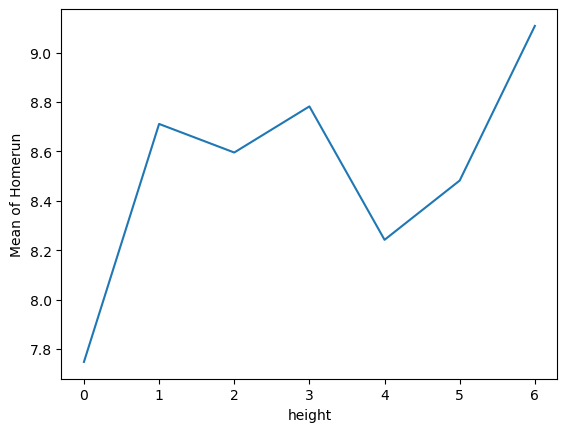

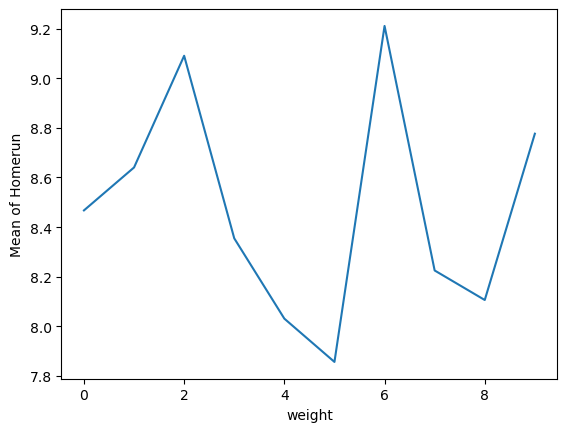

In [42]:
# Display graph before transforming

for column in ['height', 'weight']:
    pd.concat([train_t, y_train], axis=1).groupby(column)['hr'].mean().plot()
    plt.ylabel('Mean of Homerun')
    plt.show()

In [43]:
enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t[['height', 'weight']], y_train_new)

OrdinalEncoder()

In [44]:
train_t2 = enc.transform(train_t[['height', 'weight']])
test_t2 = enc.transform(test_t[['height', 'weight']])

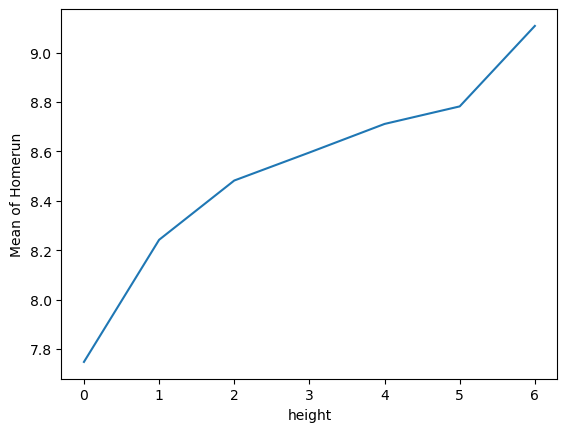

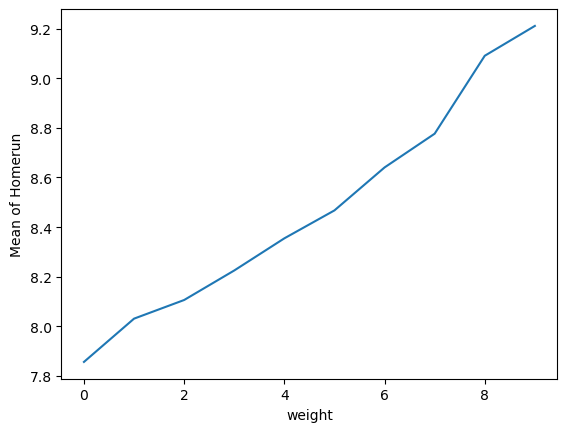

In [45]:
# Display graph after transforming

for column in ['height', 'weight']:
    pd.concat([train_t2, y_train], axis=1).groupby(column)['hr'].mean().plot()
    plt.ylabel('Mean of Homerun')
    plt.show()

In [46]:
# 2 different df concatenated as ordinal encoding encodes the categorical and therefore 2 different df were assigned accordingly to their type of variables.

df_train = pd.concat([train_t2, train_t[['bb', 'so', 'salary']]], axis = 1)
df_test = pd.concat([test_t2, test_t[['bb', 'so', 'salary']]], axis = 1)

### Categorical Data Encoding

In [47]:
# index categorical variable

cat_train = train_t[['throws']]
cat_test = test_t[['throws']]

In [48]:
for column in cat_train:
    cat_train[column] = cat_train[column].astype('object')

/var/folders/gl/yg5fbf7d12q33cp5y90mjt4c0000gn/T/ipykernel_17588/1350160674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train[column] = cat_train[column].astype('object')


In [49]:
ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)

In [50]:
ohe_enc.fit(cat_train)

OneHotEncoder()

In [51]:
X_train_ohe = ohe_enc.transform(cat_train)
X_test_ohe = ohe_enc.transform(cat_test)

In [52]:
X_train_ohe

,throws_R,throws_L
110101,1,0
4271,1,0
47567,1,0
10937,1,0
98272,0,1
...,...,...
41993,1,0
97639,1,0
95939,1,0
117952,1,0


In [53]:
# concatenation of 2 df in preparation to train the model

df_train_1 = pd.concat([df_train, X_train_ohe], axis = 1)
df_test_1 = pd.concat([df_test, X_test_ohe], axis = 1)

### Feature Scaling

In [54]:
# MinMaxScaler utilised

scaler = MinMaxScaler()
scaler.fit(df_train[['bb', 'so', 'salary']])

MinMaxScaler()

In [55]:
df_train_1[['bb', 'so', 'salary']] = scaler.transform(df_train[['bb', 'so', 'salary']])
df_test_1[['bb', 'so', 'salary']] = scaler.transform(df_test[['bb', 'so', 'salary']])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

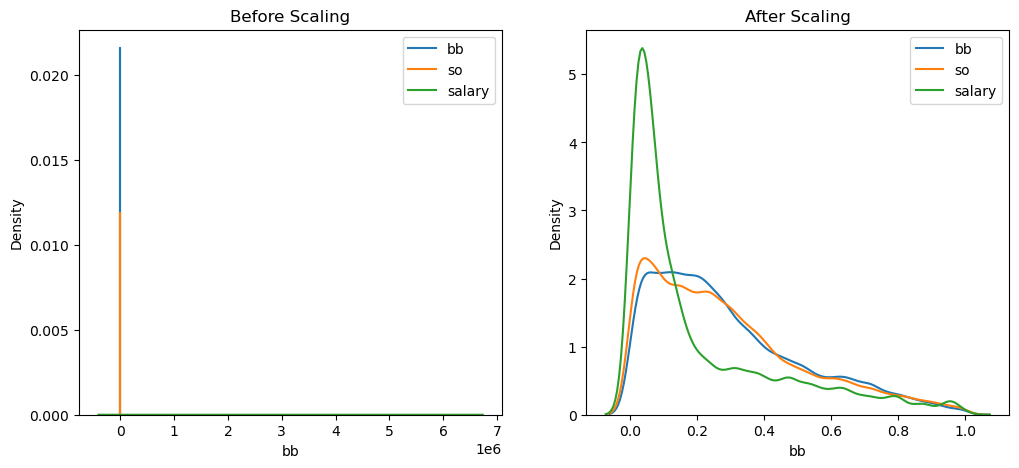

In [56]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df_train['bb'], ax=ax1, label ='bb')
sns.kdeplot(df_train['so'], ax=ax1, label ='so')
sns.kdeplot(df_train['salary'], ax=ax1, label ='salary')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(df_train_1['bb'], ax=ax2, label ='bb')
sns.kdeplot(df_train_1['so'], ax=ax2, label ='so')
sns.kdeplot(df_train_1['salary'], ax=ax2, label ='salary')
ax2.legend()
plt.show()

## Step 4: Machine Learning Modelling

## Naive Baseline

In [57]:
# pick the mean target value from all of train data

print(y_train_new.mean())

mean_target_value = y_train_new.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

8.471259196205995
The train mean target value is 8.47.


In [58]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_ohe.iloc[:,0]]
y_train_preds_naive[0:5]

[8.47, 8.47, 8.47, 8.47, 8.47]

In [59]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_ohe.iloc[:,0]]
y_test_preds_naive[0:5]

[8.47, 8.47, 8.47, 8.47, 8.47]

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train_new
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train_new
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train_new
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 59.38.
The Naive Baseline Model's MSE on test data is 66.79.

The Naive Baseline Model's RMSE on train data is 7.71.
The Naive Baseline Model's RMSE on test data is 8.17.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.01.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Linear Regression Model

In [61]:
X_train_final = df_train_1
X_test_final = df_test_1

y_train_final = y_train_new
y_test_final = y_test


# Displaying the number of rows and columns in your final dataset
X_train_final.shape

(82235, 7)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
train_mse = mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final))
test_mse = mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final))
print(f'train_mse: {train_mse:.2f}\n test_mse: {test_mse:.2f}')


print()

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower RMSE, the better the model performance
train_rmse = np.sqrt(mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)))
test_rmse = np.sqrt(mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))
print(f'train_rmse: {train_rmse:.2f}\n test_mse: {test_rmse:.2f}')

print()

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
train_r2 = r2_score(y_train_final, model_linear_regression.predict(X_train_final))
test_r2 = r2_score(y_test_final, model_linear_regression.predict(X_test_final))

print(f'train_r-sq: {train_r2:.2f}\n test_r-sq: {test_r2:.2f}')

train_mse: 21.48
 test_mse: 26.56

train_rmse: 4.63
 test_mse: 5.15

train_r-sq: 0.64
 test_r-sq: 0.60


## Report

### Introduction with Value Based Problem Statement

In professional baseball, the home run is one of the most significant events in the game. It not only provides a boost to a team's score but also can shift the momentum of a game. As such,  accurately predicting home runs can provide strategic advantages to teams, coaches, and analysts. Given the wealth of available data based on historical performance and other relevant features, this presents an ideal opportunity to develop predictive models for the number of home runs. This model will help management make informed decisions about hiring the most talented and elite baseball players.

### Problem Formulation

The 'player', 'pitching', and 'salary' datasets were selected and explored: in 'player', we focused on the physical statistics ('height' and 'weight'); in 'pitching', we examined pitching statistics ('hr' for home run, 'bb' for base on balls, 'so' for strikeouts and 'throws' for laterality); and in 'salary', we analysed the 'salary' column to understand player compensation. The missing data analysis revealed that 'height' had 805 missing values, 'weight' had 871 missing values, and there were no null values in 'bb', 'so', and 'salary'. The columns 'year', 'team_id' and 'league_id' were present in both the 'pitching' and 'salary' datasets. If the data in both columns are identical, the duplicated columns can be dropped before merging. If the data in both columns are unique, they should be renamed to prevent confusion. However, since these features were not utilised, this step was not performed in the assignment. To determine if the model can predict home runs based on physical statistics, pitching statistics and salary, home runs will be designated as the target variable while the remaining features will serve as the independent variables.

### Data Wrangling on multiple tables, Data Cleansing and Transformation

The 'player', 'pitching' and 'salary' datasets were merged with an inner join on 'primary_id' as the primary key. No null values were found on the columns of interest during the analyis after the merge. Five of these are numerical variables: 'height', 'weight', 'hr', 'bb', and 'so', while one is a categorical variable: 'throws'. 

We further investigated the linear relationship between the selected numerical variables. There is a strong positive relationship between 'bb', 'so' and 'salary' and the target variable. Interestingly, although 'height' and 'weight' were labelled as numerical variables, they appeared segmented in the plots because the data is recorded without decimal places. Consequently, they will be further processed to be treated as categorical variable before training the model.

Histograms, Q-Q plots, and box plots were created for 'bb', 'so' and 'salary' to analyse their distributions and detect any outliers. These outliers in the dataset were addressed through trimming. During the train-test split, the data set except the target variable was allocated such that 70% of the data was used for the training set and 30% for the test set. The 'height' and 'weight' columns were discretized using equal frequency discretization to create ranges and then encoded ordinally to establish a monotonic relationship. For the 'throws' column which is categorical, one-hot encoding was applied.

### Machine Learning Model

The final dataframe prepared for model training consists of 82235 rows and 7 columns. A naive baseline was build to establish a baseline to compare with more complex linear regression models. The Naive Baseline Model's test data metrics revealed MSE of 66.79, an RMSE of 8.17, and an R² of -0.01 while the Linear Regression Model's test data metrics showed an MSE of 26.56, an RMSE of 5.15 and an R² of 0.60. 

### Summary and Further Improvements

Overall, the linear regression model demonstrates better performance in terms of both error metrics and variance compared to the naive baseline model as it consistently achieves lower MSE and RMSE values and demonstrates a moderate relationship with the home run counts, as indicated by its R² value. 

While the current model provides valuable insights into factors affecting home runs, there is potential for further improvement. The Linear Regression Model’s RMSE of 5.15 indicates that the prediction error is relatively high compared to the mean value of about 9.27. The model's R² value of 0.60 indicates that it explains a good portion of the variance in home run performance but suggests there is still some variability that could be accounted for with additional or improved features. 

Incorporating additional relevant features can improve the model’s capacity to identify and understand the underlying patterns in the data. This can potentially lead to better predictions if the new features provide additional useful information about the target variable. 